# Data Exploration : Santé Publique France 

## Imports

In [1]:
import json
import pandas as pd 
import os
import sys
import matplotlib.pyplot as plt

In [2]:
# Import custom modules/functions

sys.path.insert(0, os.path.abspath('../covidex'))
from utils.mapping import map_dep_region
from plot.main import plot_death_per_date
from utils.filter import filter_data

## Load SPF data

In [3]:
spf_data = pd.read_json("../data/opencovid19_data.json")
spf_data.sample(1)

,date,source,sourceType,deces,decesEhpad,hospitalises,gueris,nom,code,casConfirmes,...,capaciteLitsSoinsIntensifs,hospitalisation,hospitalise,hospitalisesReadaptation,hospitalisesAuxUrgences,hospitalisesConventionnelle,reanimations,capaciteReanimation,casEhpad,casPossiblesEhpad
10401,2020-05-16,{'nom': 'OpenCOVID19-fr'},opencovid19-fr,6710.0,NaN,8164.0,22119.0,Île-de-France,REG-11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Load mapping data/functions

The SPF data contains data from each department and each regions. In order to avoid to count values twice, we need a dictionnary to filter the data from regions and data from departments.

In [11]:
with open("../data/departements-region.json", 'r') as file:
    region_dep_json = json.load(file)
df_region_dep = pd.DataFrame(region_dep_json)
df_region_dep.iloc[:3]


Example of mapping function : Île-de-France



,num_dep,dep_name,region_name
0,01,Ain,Auvergne-Rhône-Alpes
1,02,Aisne,Hauts-de-France
2,03,Allier,Auvergne-Rhône-Alpes


In [15]:
# Example with 'Hauts-de-Seine' in the region 'Ile-de-France'

print("Example of mapping function : \n Input : Hauts-de-Seine \n Output : "+map_dep_region(df_region_dep, "dep_name", 'Hauts-de-Seine', "region_name")+"\n")
region_list = df_region_dep['region_name'].unique().tolist()
dep_list = df_region_dep['dep_name'].unique().tolist()

Example of mapping function : 
 Input : Hauts-de-Seine 
 Output : Île-de-France



## Death count (Hors Ehpad)

In [7]:
from datetime import date
today = date.today().strftime("%y-%m-%d")

/Users/samuel/PycharmProjects/covidex/covidex/utils/filter.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered = df[df.nom == location][df.sourceType==data_provider][time_interval[1]>df.date][df.date> time_interval[0]]


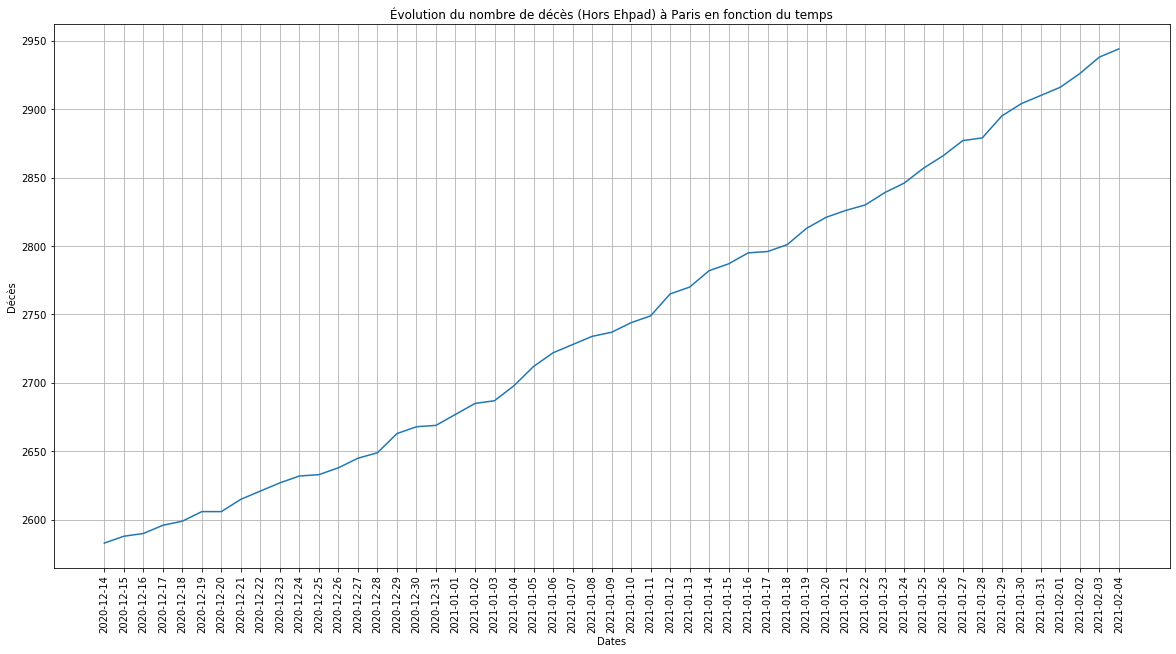

In [8]:
time_interval = ['2020-12-13', today]
location = 'Paris'
data_provider = 'sante-publique-france-data'

dates, deces_france = filter_data(spf_data, time_interval, location, data_provider)
plot_death_per_date(dates, deces_france, 'Paris')